In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adquire os dados históricos do IPCA

In [15]:
file = '/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/data/ipca_editado.csv'
raw_data = pd.read_csv(file, sep=',').T
data = raw_data.loc['janeiro 1995':, :].copy()
dates = pd.date_range(start='1995-01-01', end='2021-07-01', freq='MS')
data.index = dates
data.columns = ['IPCA']

,IPCA
1995-01-01,1.7
1995-02-01,1.02
1995-03-01,1.55
1995-04-01,2.43
1995-05-01,2.67
...,...
2021-03-01,0.93
2021-04-01,0.31
2021-05-01,0.83
2021-06-01,0.53


In [14]:
output_path = '/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/output/' 
file_write = output_path + 'ipca.csv'
data.to_csv(file_write)

'/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/output/ipca.csv'

In [3]:
data.describe()

,IPCA
count,319.00
unique,134.00
top,0.24
freq,7.00


# Gráficos da série histórica do IPCA

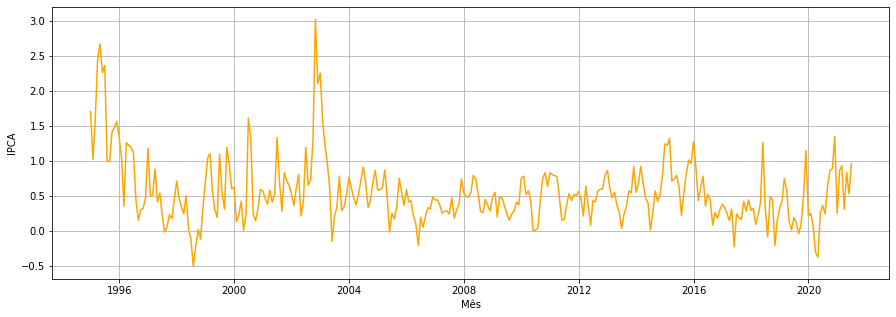

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(data, color='orange')
plt.grid()
plt.xlabel('Mês')
plt.ylabel('IPCA')
plt.show()

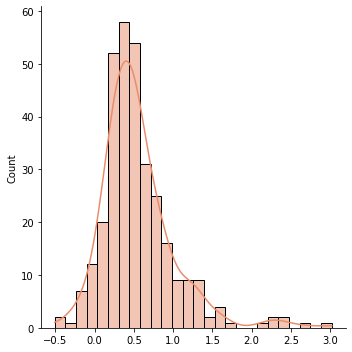

In [5]:
sns.set_palette('flare')
sns.displot(list(data.IPCA), kde=True);

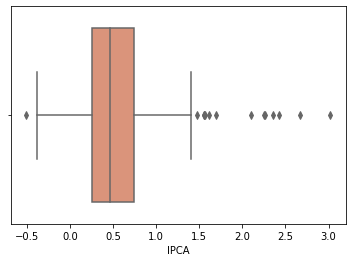

In [6]:
sns.boxplot(x=data.IPCA);

In [7]:
file = '/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/data/ipca_anual.csv'
ipca_ano = pd.read_csv(file, header=None)
ipca_ano.columns = ['ano', 'ipca']

# IPCA acumulado anual

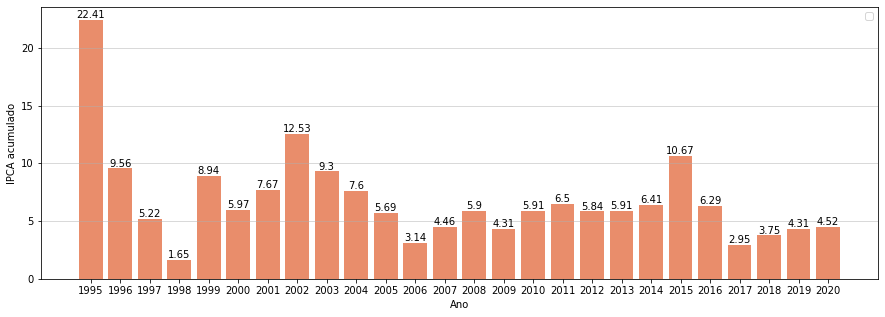

In [8]:
plt.figure(figsize=(15, 5))
plt.bar(ipca_ano.ano, ipca_ano.ipca)
plt.legend([])
plt.xticks(ipca_ano.ano)
plt.xlabel('Ano')
plt.ylabel('IPCA acumulado')
plt.grid(axis='y', alpha=0.6)
for i in range(len(ipca_ano)):
  plt.annotate(ipca_ano.iloc[i, 1],
               xy=(ipca_ano.iloc[i, 0], ipca_ano.iloc[i, 1]),
               textcoords='offset points',
               xytext=(0, 2),
               ha='center')
plt.show()

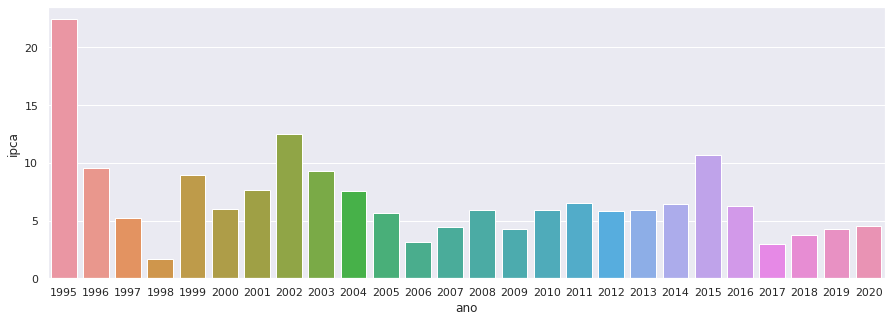

In [9]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(y='ipca', x='ano', data=ipca_ano);